In [2]:
%matplotlib inline

# Packages
import os, glob, scipy, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Project directory
base_dir = os.path.realpath('..')
print(base_dir)

# Project-specific functions
funDir = os.path.join(base_dir,'Code/Functions')
print(funDir)
sys.path.append(funDir)
import choiceModels, costFunctions, penalizedModelFit, simulateModel

# General-use python functions
dbPath = '/'.join(base_dir.split('/')[0:4])
sys.path.append('%s/Python'%dbPath)
import FigureTools

/Users/jeroen/Dropbox (Brown)/PhD/0. Working folder/HMTG_followUp_final/ShareDataCode
/Users/jeroen/Dropbox (Brown)/PhD/0. Working folder/HMTG_followUp_final/ShareDataCode/Code/Functions


## Visualize clustered parameter space

We simulated behavior from the computational model at 101x101 equidistant points in the model parameter space. We then used a clustering algorithm to group the 10201 points together by similarity in their predicted behavior. The results are stored in the "ClusteringMapMelted" data files:

In [3]:
study = 1
baseMult = 4
model = 'MP_ppSOE'
precision = 100

In [4]:
fnstring = 'Study-%i'%study
if study == 1:
    fnstring = fnstring + '_baseMult-%i'%baseMult
thetaPhi = pd.read_csv(os.path.join(base_dir,'Data/Study%i/ComputationalModel'%study,
            'ClusteringMapMelted_%s_model-%s_precision-100.csv'%(fnstring,model)),index_col=0)
nclust = len(np.unique(thetaPhi['cluster']))
thetaPhi.head()

,theta,phi,cluster
0,0.0,-0.100,1
1,0.0,-0.098,1
2,0.0,-0.096,1
3,0.0,-0.094,1
4,0.0,-0.092,1


Here is an example visualization (full version below):

In [5]:
# Set color map
cmapje = sns.color_palette('tab10',nclust)
mixFactor = 2
cmapje = [((a[0]*mixFactor+1)/(mixFactor+1),(a[1]*mixFactor+1)/(mixFactor+1),(a[2]*mixFactor+1)/(mixFactor+1)) for a in cmapje]

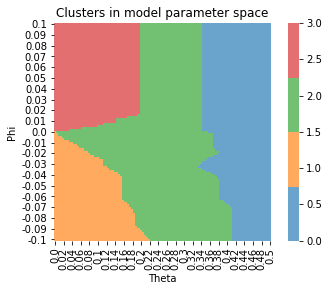

In [6]:
# Plot (the y ticks are messed up)
thetaPhiPivot = thetaPhi.pivot('theta','phi','cluster').T
ax = sns.heatmap(thetaPhiPivot,cmap=cmapje,square=True)
plt.xlabel('Theta')
plt.ylabel('Phi')
plt.title('Clusters in model parameter space')
ax.invert_yaxis()

In [6]:
# Store cluster keys based on moral phenotype territory plots
if study == 1:
    if baseMult == 4:
        clustOrder = ['GR','GA','MO','IA']
    elif baseMult == 6:
        clustOrder = ['GR','MO','IA','GA']
elif study == 2:
    clustOrder = ['GR','GA','IA','MO']

## Load fitted model params

In [7]:
# Take fitted parameters and select nearest neighbor in the discretized theta-phi space => cluster label
columns = ['sub','theta','phi','ClustName']
if study == 1:
    fittedParams = pd.read_csv(os.path.join(base_dir,'Data/Study1/ComputationalModel',
                        'ParamsClusters_study-1_baseMult-%i_model-%s_precision-%i.csv'%(
                        baseMult,model,precision)),index_col=0)
    exclude = np.array(pd.read_csv(os.path.join(base_dir,'Data/Study1/HMTG/exclude.csv'),index_col=None,header=None).T)[0]
elif study == 2:
    fittedParams = pd.read_csv(os.path.join(base_dir,'Data/Study2/ComputationalModel',
                        'ParamsClusters_study-2_model-%s_precision-%i.csv'%(
                        model,precision)),index_col=0)
    exclude = np.array(pd.read_csv(os.path.join(base_dir,'Data/Study2/HMTG/exclude.csv'),index_col=0,header=0).T)[0]
fittedParams = fittedParams.loc[(~fittedParams['sub'].isin(exclude)),columns]
subNums = np.unique(fittedParams['sub'])
print (len(subNums))
print (subNums)
fittedParams.head()

102
[  1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]


,sub,theta,phi,ClustName
0,1,0.081617,-0.001948,MO
1,2,0.497320,0.081674,GR
2,3,0.054459,0.002582,MO
3,4,0.101683,0.037533,IA
4,5,0.024787,0.048618,IA


## Plot on parameter space

{1: 'GR', 2: 'GA', 3: 'MO', 4: 'IA'}
1 GR 0 o 50
2 GA 1 * 100
3 MO 3 d 75
4 IA 2 s 40
{1: 'GR', 2: 'MO', 3: 'IA', 4: 'GA'}
1 GR 0 o 50
2 MO 3 d 75
3 IA 2 s 40
4 GA 1 * 100
{1: 'GR', 2: 'GA', 3: 'IA', 4: 'MO'}
1 GR 0 o 50
2 GA 1 * 100
3 IA 2 s 40
4 MO 3 d 75


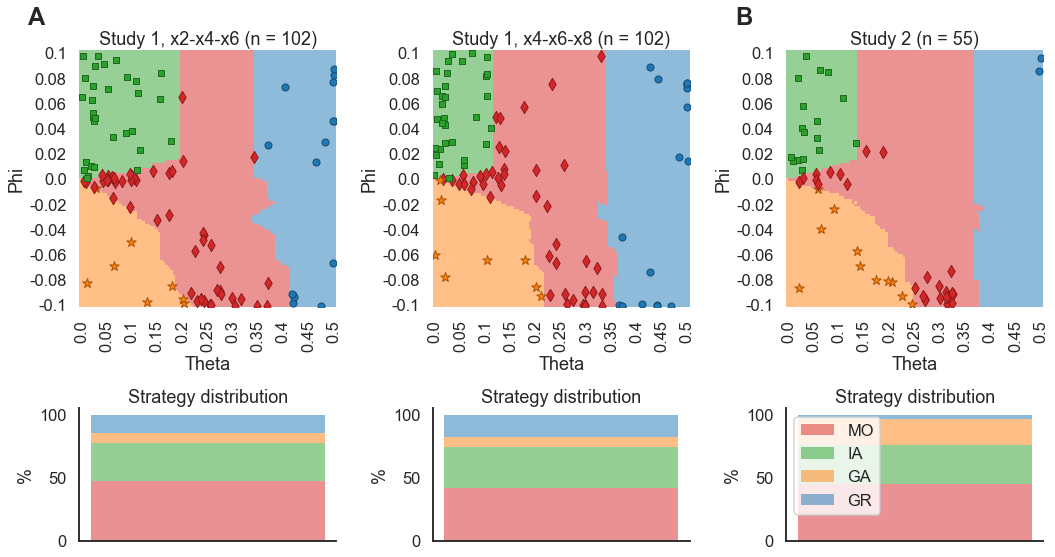

In [7]:
FigureTools.mydesign(context='talk')
sns.set_style('white')
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=[15,8],gridspec_kw={'height_ratios':[2,1]})

context = [[1,4],[1,6],[2,0]]
precision = 100
desiredOrder = ['GR','GA','IA','MO']
barStackOrder = ['MO','IA','GA','GR']
model = 'MP_ppSOE'

# Cmap
nclust = len(desiredOrder)
cmapje = sns.color_palette('tab10',nclust)
scatter_cmap = cmapje
scatter_edge_cmap = np.divide(cmapje,1.5)
bgMixFactor = 1
bg_cmap = [((a[0]*bgMixFactor+1)/(bgMixFactor+1),(a[1]*bgMixFactor+1)/(bgMixFactor+1),(a[2]*bgMixFactor+1)/(bgMixFactor+1)) for a in cmapje]
markers = ['o','*','s','d']
sizes = [50,100,40,75]

for contextInd,context in enumerate(context):
    study = context[0]
    baseMult = context[1]
    
    # Load model space
    fnstring = 'Study-%i'%study
    if study == 1:
        fnstring = fnstring + '_baseMult-%i'%baseMult
    thetaPhi = pd.read_csv(os.path.join(base_dir,'Data/Study%i/ComputationalModel'%study,
                'ClusteringMapMelted_%s_model-%s_precision-100.csv'%(fnstring, model)),index_col=0)
    nclust = len(np.unique(thetaPhi['cluster']))
    thetaPhiPivot = thetaPhi.pivot('theta','phi','cluster').T

    # Load parameters
    columns = ['sub','theta','phi','ClustName']
    if study == 1:
        fittedParams = pd.read_csv(os.path.join(base_dir,'Data/Study1/ComputationalModel',
                            'ParamsClusters_study-1_baseMult-%i_model-%s_precision-%i.csv'%(
                            baseMult,model,precision)),index_col=0)
        exclude = np.array(pd.read_csv(os.path.join(base_dir,'Data/Study1/HMTG/exclude.csv'),index_col=None,header=None).T)[0]
    elif study == 2:
        fittedParams = pd.read_csv(os.path.join(base_dir,'Data/Study2/ComputationalModel',
                            'ParamsClusters_study-2_model-%s_precision-%i.csv'%(
                            model,precision)),index_col=0)
        exclude = np.array(pd.read_csv(os.path.join(base_dir,'Data/Study2/HMTG/exclude.csv'),index_col=0,header=0).T)[0]
    fittedParams = fittedParams.loc[(~fittedParams['sub'].isin(exclude)),columns]
    subNums = np.unique(fittedParams['sub'])
    
    # Store cluster keys based on moral phenotype territory plots
    if study == 1:
        if baseMult == 4:
            clustOrder = ['GR','GA','MO','IA']
        elif baseMult == 6:
            clustOrder = ['GR','MO','IA','GA']
    elif study == 2:
        clustOrder = ['GR','GA','IA','MO']
    clustDict = dict(zip(np.arange(1,len(clustOrder)+1),clustOrder))
    print(clustDict)

    #Map scatter to heat map
    transform = [desiredOrder.index(clustOrder[i]) for i in range(len(clustOrder))]
    x_num = np.size(thetaPhiPivot,0)
    y_num = np.size(thetaPhiPivot,1)
    x_range = np.float(thetaPhiPivot.columns[x_num-1])-np.float(thetaPhiPivot.columns[0])
    y_range = np.float(thetaPhiPivot.index[y_num-1])-np.float(thetaPhiPivot.index[0])
    y_start = 0.1

    # Open figure
    axParamSpace = ax[0,contextInd]
    sns.heatmap(thetaPhiPivot,ax=axParamSpace,cmap=[bg_cmap[i] for i in transform],cbar=False)
    if study == 1:
        title_bit = ', x%i-x%i-x%i'%(baseMult-2,baseMult,baseMult+2)
    else:
        title_bit = ''
    npart = len(subNums)
    axParamSpace.set_title('Study %i%s (n = %i)'%(study,title_bit,npart))
    axParamSpace.set_xlabel('Theta')
    axParamSpace.set_ylabel('Phi')
    axParamSpace.set_aspect(1)
    axParamSpace.invert_yaxis()
    axParamSpace.set_yticks(np.arange(1,precision+2,(precision-1)/10));
    axParamSpace.set_yticklabels(np.round(np.arange(-.1,.11,.02),decimals=2));
    axParamSpace.set_xticks(np.arange(1,precision+2,(precision-1)/10));
    axParamSpace.set_xticklabels(np.round(np.arange(0,.51,.05),decimals=2,));

    for i,curClust in enumerate(clustOrder):
        clustInd = i+1
        listInd = desiredOrder.index(curClust)
        marker = markers[listInd]; color = scatter_cmap[listInd];
        size = sizes[listInd]; edgecolor = scatter_edge_cmap[listInd];
        print(clustInd,curClust,listInd,marker,size)
        thetaCur = fittedParams.loc[fittedParams['ClustName']==curClust,'theta']
        phiCur = -fittedParams.loc[fittedParams['ClustName']==curClust,'phi']
        axParamSpace.scatter(x=.5+thetaCur/x_range*(x_num-1),y=.5+(y_start-phiCur)/y_range*(y_num-1),
                   marker=marker,color=color,edgecolor=edgecolor,s=size,lw=1)
    
    # Add counts
    axCounts = ax[1,contextInd]
    top = 0
    heights = np.divide(fittedParams['ClustName'].value_counts().astype(float),npart)*100
    handles = np.empty([4,1])
    for ci,clust in enumerate(barStackOrder):
        height = heights.loc[clust]
        color = scatter_cmap[desiredOrder.index(clust)]
        axCounts.bar(0,height,1,top,color=color, lw=0,alpha=.5)
        top = top + height
    sns.despine(ax=axCounts)
    plt.legend(barStackOrder,loc=2)
    axCounts.set(xticks=[], ylabel = '%', title= 'Strategy distribution')
FigureTools.add_subplot_letter(ax[0,0])
FigureTools.add_subplot_letter(ax[0,2],'B')
plt.tight_layout()
plt.savefig(base_dir + '/Results/Figure3.pdf',bbox_inches='tight')
plt.savefig(base_dir + '/Results/Figure3.png',bbox_inches='tight', dpi = 300, transparent = True)